In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import datetime

In [2]:
df=pd.read_csv('train.csv')
#欠損している−１を０か１にしている。ランダムで０、１を選ぶ
for i in range(len(df['price_am'])):
    random.seed(123)
    if df['price_am'][i]==-1:
        df.replace(-1,random.choice([0,1]),inplace=True)
df['week']='a'

#datetimeから曜日を取得して、データに曜日データを加えている。
for i in range(len(df['datetime'])):
    s_dow = datetime.datetime.strptime(df['datetime'][i], '%Y-%m-%d').strftime('%A')
    df['week'][i]=s_dow
    
# 曜日データのダミー変数を取得している
df_week=pd.get_dummies(df['week'])

#weekの行はダミー変数で補えるので消す。
df_=df.drop('week',axis=1)
#ダミー変数と提供されているデータを結合
data=pd.concat([df_,df_week],axis=1)

#csvファイルで保存
#data.to_csv('train_data.csv',index=False)

<ipython-input-2-354fc95e44db>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'][i]=s_dow


## 同様の前処理をテストデータにも施して保存する

In [3]:
test_df=pd.read_csv('test.csv')
for i in range(len(test_df['price_am'])):
    random.seed(123)
    if test_df['price_am'][i]==-1:
        test_df.replace(-1,random.choice([0,1]),inplace=True)
test_df['week']='a'

#datetimeから曜日を取得して、データに曜日データを加えている。
for i in range(len(test_df['datetime'])):
    s_dow = datetime.datetime.strptime(test_df['datetime'][i], '%Y-%m-%d').strftime('%A')
    test_df['week'][i]=s_dow
    
# 曜日データのダミー変数を取得している
test_df_week=pd.get_dummies(test_df['week'])

#weekの行はダミー変数で補えるので消す。
test_df_=test_df.drop('week',axis=1)
#ダミー変数と提供されているデータを結合
test_data=pd.concat([test_df_,test_df_week],axis=1)

#csvファイルで保存
#test_data.to_csv('test_data.csv',index=False)

<ipython-input-3-4721e9402efd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['week'][i]=s_dow


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

TypeError: unsupported operand type(s) for /: 'str' and 'int'

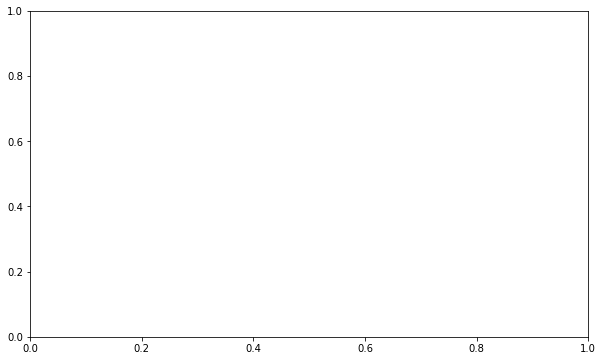

In [13]:
plt.figure(figsize=(10,6))
plt.boxplot(data.iloc[:,0])
plt.show()

,datetime,y,client,close,price_am,price_pm,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2010-07-01,17,0,0,0,0,0,0,0,0,1,0,0
1,2010-07-02,18,0,0,0,0,1,0,0,0,0,0,0
2,2010-07-03,20,0,0,0,0,0,0,1,0,0,0,0
3,2010-07-04,20,0,0,0,0,0,0,0,1,0,0,0
4,2010-07-05,14,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,2016-03-27,94,1,0,5,4,0,0,0,1,0,0,0
2097,2016-03-28,86,1,0,4,4,0,1,0,0,0,0,0
2098,2016-03-29,98,1,0,4,4,0,0,0,0,0,1,0
2099,2016-03-30,99,1,0,5,4,0,0,0,0,0,0,1
